In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
from scipy.stats import kruskal

In [2]:
df_filepath = '/Users/User/Desktop/P2 testing/hospital.csv'
df_hospital = pd.read_csv(df_filepath)
# df = df.drop('state', 1)
df_hospital.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8


In [3]:
df_bed = df_hospital.groupby('date').sum()
df_bed

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
date,,,,,,,,,,,,
2020-03-24,19457,3587,18908,14,22,36,1,25,26,1019,353,357
2020-03-25,19419,3611,18857,101,110,211,61,22,83,1229,547,249
2020-03-26,19627,3819,19065,81,89,170,40,31,71,1347,432,7407
2020-03-27,19627,3819,19065,132,99,231,52,54,106,1422,480,7691
2020-03-28,21118,3969,20474,116,156,272,62,84,146,1491,568,8324
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-03,44073,12440,42469,598,2047,2645,504,1546,2050,7044,1278,21256
2022-03-04,44073,12559,42462,632,1994,2626,415,1517,1932,7130,1395,20384
2022-03-05,44089,12632,42478,554,2020,2574,436,1523,1959,7391,1327,19954


In [4]:
df_filepath = '/Users/User/Desktop/P2 testing/checkin_malaysia.csv'
df_checkin = pd.read_csv(df_filepath)

df_checkin.head()

,date,checkins,unique_ind,unique_loc
0,2020-12-01,17492265,6614474,630363
1,2020-12-02,17695726,6667261,648752
2,2020-12-03,17063123,6549583,645604
3,2020-12-04,18350879,6803979,622383
4,2020-12-05,19711082,6845366,573132


In [5]:
df_filepath = '/Users/User/Desktop/P2 testing/trace_malaysia.csv'
df_ccontact = pd.read_csv(df_filepath)

df_ccontact.tail()

,date,casual_contacts,hide_large,hide_small
373,2022-03-12,1027015,989.0,12495.0
374,2022-03-13,917130,816.0,11188.0
375,2022-03-14,785259,851.0,11467.0
376,2022-03-15,788770,862.0,11309.0
377,2022-03-16,840866,869.0,12112.0


In [6]:
df_filepath = '/Users/User/Desktop/P2 testing/vax_malaysia.csv'
df_vax = pd.read_csv(df_filepath)

df_vax.tail()

,date,daily_partial,daily_full,daily_booster,daily,daily_partial_adol,daily_full_adol,daily_partial_child,daily_full_child,cumul_partial,...,astra2,astra3,sinopharm1,sinopharm2,sinopharm3,cansino,cansino3,pending1,pending2,pending3
382,2022-03-13,23730,1531,20569,45830,743,913,22444,0,27318742,...,12,1361,124,2,122,127,66,15,0,2
383,2022-03-14,14838,2244,36036,53118,922,1116,13153,0,27333768,...,10,2191,82,4,110,188,97,7,0,4
384,2022-03-15,18246,1898,37908,58052,790,947,16728,0,27352105,...,10,1787,88,13,101,91,65,9,0,7
385,2022-03-16,12995,1983,33733,48711,702,871,11623,0,27365469,...,9,1090,67,6,153,369,49,89,0,2
386,2022-03-17,13256,2166,30617,46039,800,1052,11739,0,27379023,...,22,1161,50,22,73,298,57,92,4,181


In [7]:
df_filepath = '/Users/User/Desktop/P2 testing/cases_malaysia.csv'
df_cases = pd.read_csv(df_filepath)

df_cases.tail()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
778,2022-03-13,22535,361,25356,320622,163,3221,506,6052,12756,...,1448,700,288,0.0,0.0,7.0,40.0,8.0,61.0,153.0
779,2022-03-14,22030,394,33872,308710,180,3133,549,5824,12524,...,1339,677,295,0.0,0.0,3.0,7.0,56.0,10.0,104.0
780,2022-03-15,26534,691,31234,303964,340,3817,671,6598,15448,...,1679,767,300,0.0,0.0,3.0,7.0,56.0,10.0,104.0
781,2022-03-16,28298,697,33009,299246,235,4380,746,7183,15989,...,1762,783,349,0.0,0.0,0.0,40.0,227.0,12.0,61.0
782,2022-03-17,27004,719,29450,296800,447,3807,755,6339,16103,...,1719,774,345,0.0,0.0,3.0,131.0,80.0,107.0,126.0


In [8]:
df_merge1 = pd.merge(df_bed, df_checkin, how = 'outer', on = 'date' )
df_merge1

,date,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,checkins,unique_ind,unique_loc
0,2020-03-24,19457.0,3587.0,18908.0,14.0,22.0,36.0,1.0,25.0,26.0,1019.0,353.0,357.0,NaN,NaN,NaN
1,2020-03-25,19419.0,3611.0,18857.0,101.0,110.0,211.0,61.0,22.0,83.0,1229.0,547.0,249.0,NaN,NaN,NaN
2,2020-03-26,19627.0,3819.0,19065.0,81.0,89.0,170.0,40.0,31.0,71.0,1347.0,432.0,7407.0,NaN,NaN,NaN
3,2020-03-27,19627.0,3819.0,19065.0,132.0,99.0,231.0,52.0,54.0,106.0,1422.0,480.0,7691.0,NaN,NaN,NaN
4,2020-03-28,21118.0,3969.0,20474.0,116.0,156.0,272.0,62.0,84.0,146.0,1491.0,568.0,8324.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27032971.0,9968241.0,674189.0
719,2022-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24832185.0,9317831.0,529831.0
720,2022-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23566660.0,9522960.0,761058.0
721,2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23607874.0,9531396.0,773594.0


In [9]:
df_merge2 = pd.merge(df_merge1, df_ccontact, how = 'outer', on = 'date' )
df_merge2

,date,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,checkins,unique_ind,unique_loc,casual_contacts,hide_large,hide_small
0,2020-03-24,19457.0,3587.0,18908.0,14.0,22.0,36.0,1.0,25.0,26.0,1019.0,353.0,357.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-25,19419.0,3611.0,18857.0,101.0,110.0,211.0,61.0,22.0,83.0,1229.0,547.0,249.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-26,19627.0,3819.0,19065.0,81.0,89.0,170.0,40.0,31.0,71.0,1347.0,432.0,7407.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-27,19627.0,3819.0,19065.0,132.0,99.0,231.0,52.0,54.0,106.0,1422.0,480.0,7691.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-28,21118.0,3969.0,20474.0,116.0,156.0,272.0,62.0,84.0,146.0,1491.0,568.0,8324.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27032971.0,9968241.0,674189.0,1027015.0,989.0,12495.0
721,2022-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24832185.0,9317831.0,529831.0,917130.0,816.0,11188.0
722,2022-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23566660.0,9522960.0,761058.0,785259.0,851.0,11467.0
723,2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23607874.0,9531396.0,773594.0,788770.0,862.0,11309.0


In [10]:
df_merge3 = pd.merge(df_merge2, df_vax, how = 'outer', on = 'date' )
df_merge3

,date,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,...,astra2,astra3,sinopharm1,sinopharm2,sinopharm3,cansino,cansino3,pending1,pending2,pending3
0,2020-03-24,19457.0,3587.0,18908.0,14.0,22.0,36.0,1.0,25.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-25,19419.0,3611.0,18857.0,101.0,110.0,211.0,61.0,22.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-26,19627.0,3819.0,19065.0,81.0,89.0,170.0,40.0,31.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-27,19627.0,3819.0,19065.0,132.0,99.0,231.0,52.0,54.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-28,21118.0,3969.0,20474.0,116.0,156.0,272.0,62.0,84.0,146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,2022-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,1361.0,124.0,2.0,122.0,127.0,66.0,15.0,0.0,2.0
722,2022-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,2191.0,82.0,4.0,110.0,188.0,97.0,7.0,0.0,4.0
723,2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,1787.0,88.0,13.0,101.0,91.0,65.0,9.0,0.0,7.0
724,2022-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,1090.0,67.0,6.0,153.0,369.0,49.0,89.0,0.0,2.0


In [11]:
df_total = pd.merge(df_merge3, df_cases, how = 'outer', on = 'date' )
df_total

,date,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-03-24,19457.0,3587.0,18908.0,14.0,22.0,36.0,1.0,25.0,26.0,...,13,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-25,19419.0,3611.0,18857.0,101.0,110.0,211.0,61.0,22.0,83.0,...,31,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-26,19627.0,3819.0,19065.0,81.0,89.0,170.0,40.0,31.0,71.0,...,22,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-27,19627.0,3819.0,19065.0,132.0,99.0,231.0,52.0,54.0,106.0,...,13,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-28,21118.0,3969.0,20474.0,116.0,156.0,272.0,62.0,84.0,146.0,...,19,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_total.columns

Index(['date', 'beds', 'beds_covid', 'beds_noncrit', 'admitted_pui',
       'admitted_covid', 'admitted_total', 'discharged_pui',
       'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_pui',
       'hosp_noncovid', 'checkins', 'unique_ind', 'unique_loc',
       'casual_contacts', 'hide_large', 'hide_small', 'daily_partial',
       'daily_full', 'daily_booster', 'daily', 'daily_partial_adol',
       'daily_full_adol', 'daily_partial_child', 'daily_full_child',
       'cumul_partial', 'cumul_full', 'cumul_booster', 'cumul',
       'cumul_partial_adol', 'cumul_full_adol', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'pfizer3', 'sinovac1',
       'sinovac2', 'sinovac3', 'astra1', 'astra2', 'astra3', 'sinopharm1',
       'sinopharm2', 'sinopharm3', 'cansino', 'cansino3', 'pending1',
       'pending2', 'pending3', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax', 'ca

In [13]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 784
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     785 non-null    object 
 1   beds                     716 non-null    float64
 2   beds_covid               716 non-null    float64
 3   beds_noncrit             716 non-null    float64
 4   admitted_pui             716 non-null    float64
 5   admitted_covid           716 non-null    float64
 6   admitted_total           716 non-null    float64
 7   discharged_pui           716 non-null    float64
 8   discharged_covid         716 non-null    float64
 9   discharged_total         716 non-null    float64
 10  hosp_covid               716 non-null    float64
 11  hosp_pui                 716 non-null    float64
 12  hosp_noncovid            716 non-null    float64
 13  checkins                 473 non-null    float64
 14  unique_ind               4

### Drop the missing values

In [14]:
# Drop the na rows
df_total = df_total.dropna()
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 392 to 715
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     319 non-null    object 
 1   beds                     319 non-null    float64
 2   beds_covid               319 non-null    float64
 3   beds_noncrit             319 non-null    float64
 4   admitted_pui             319 non-null    float64
 5   admitted_covid           319 non-null    float64
 6   admitted_total           319 non-null    float64
 7   discharged_pui           319 non-null    float64
 8   discharged_covid         319 non-null    float64
 9   discharged_total         319 non-null    float64
 10  hosp_covid               319 non-null    float64
 11  hosp_pui                 319 non-null    float64
 12  hosp_noncovid            319 non-null    float64
 13  checkins                 319 non-null    float64
 14  unique_ind              

In [15]:
df_total.columns

Index(['date', 'beds', 'beds_covid', 'beds_noncrit', 'admitted_pui',
       'admitted_covid', 'admitted_total', 'discharged_pui',
       'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_pui',
       'hosp_noncovid', 'checkins', 'unique_ind', 'unique_loc',
       'casual_contacts', 'hide_large', 'hide_small', 'daily_partial',
       'daily_full', 'daily_booster', 'daily', 'daily_partial_adol',
       'daily_full_adol', 'daily_partial_child', 'daily_full_child',
       'cumul_partial', 'cumul_full', 'cumul_booster', 'cumul',
       'cumul_partial_adol', 'cumul_full_adol', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'pfizer3', 'sinovac1',
       'sinovac2', 'sinovac3', 'astra1', 'astra2', 'astra3', 'sinopharm1',
       'sinopharm2', 'sinopharm3', 'cansino', 'cansino3', 'pending1',
       'pending2', 'pending3', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax', 'ca

In [16]:
df_total.head(5).append(df_total.tail(5))

,date,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
392,2021-04-20,34580.0,6852.0,33413.0,433.0,621.0,1054.0,242.0,658.0,900.0,...,121,56,17,0.0,3.0,121.0,0.0,235.0,4.0,95.0
393,2021-04-21,34580.0,6864.0,33413.0,399.0,685.0,1084.0,241.0,656.0,897.0,...,123,61,17,0.0,14.0,121.0,0.0,325.0,40.0,120.0
394,2021-04-22,34580.0,6910.0,33413.0,448.0,779.0,1227.0,266.0,790.0,1056.0,...,149,64,17,0.0,37.0,65.0,1.0,501.0,51.0,152.0
395,2021-04-23,34580.0,6821.0,33413.0,431.0,780.0,1211.0,272.0,676.0,948.0,...,179,65,8,0.0,17.0,131.0,0.0,283.0,62.0,97.0
396,2021-04-24,34580.0,6821.0,33409.0,364.0,717.0,1081.0,294.0,779.0,1073.0,...,143,87,14,0.0,19.0,108.0,0.0,242.0,21.0,128.0
711,2022-03-03,44073.0,12440.0,42469.0,598.0,2047.0,2645.0,504.0,1546.0,2050.0,...,1884,775,286,0.0,0.0,8.0,40.0,256.0,34.0,134.0
712,2022-03-04,44073.0,12559.0,42462.0,632.0,1994.0,2626.0,415.0,1517.0,1932.0,...,1865,863,316,0.0,0.0,6.0,27.0,264.0,20.0,155.0
713,2022-03-05,44089.0,12632.0,42478.0,554.0,2020.0,2574.0,436.0,1523.0,1959.0,...,1942,807,323,0.0,0.0,9.0,75.0,127.0,72.0,111.0
714,2022-03-06,44089.0,12694.0,42478.0,471.0,1736.0,2207.0,381.0,1345.0,1726.0,...,1622,757,313,0.0,0.0,0.0,9.0,57.0,5.0,145.0
715,2022-03-07,44209.0,12887.0,42602.0,554.0,1871.0,2425.0,382.0,1481.0,1863.0,...,1590,792,298,0.0,0.0,3.0,3.0,369.0,8.0,104.0


In [17]:
df_total.describe()

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,40626.937304,13176.736677,38794.015674,517.288401,1166.808777,1684.097179,368.984326,996.742947,1365.727273,6614.322884,...,588.119122,246.570533,87.404389,0.865204,25.203762,197.009404,30.642633,93.260188,39.000000,503.805643
std,2346.100663,3145.191816,2170.991169,87.896263,611.333693,611.525297,63.320114,468.750597,465.361654,3625.255431,...,374.836130,163.409065,61.761889,4.267474,60.051491,209.799837,33.376886,141.502777,62.471528,511.199084
min,34131.000000,6662.000000,32869.000000,294.000000,249.000000,669.000000,233.000000,229.000000,596.000000,1772.000000,...,121.000000,56.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,40090.000000,11246.000000,38147.000000,458.500000,632.500000,1159.500000,324.000000,585.500000,960.500000,3758.500000,...,300.000000,125.000000,42.000000,0.000000,0.000000,9.000000,5.000000,12.000000,0.000000,89.000000
50%,41252.000000,12887.000000,39322.000000,517.000000,1186.000000,1684.000000,362.000000,1022.000000,1376.000000,6187.000000,...,457.000000,193.000000,68.000000,0.000000,3.000000,137.000000,18.000000,33.000000,6.000000,231.000000
75%,42073.000000,15366.000000,39870.000000,573.000000,1556.500000,2079.500000,408.000000,1374.000000,1729.500000,8283.000000,...,855.000000,348.000000,124.000000,0.000000,17.000000,329.500000,45.000000,88.500000,54.000000,931.000000
max,44209.000000,18886.000000,42602.000000,808.000000,2695.000000,3187.000000,625.000000,2079.000000,2481.000000,14753.000000,...,1942.000000,863.000000,323.000000,54.000000,359.000000,825.000000,189.000000,920.000000,369.000000,2135.000000


In [18]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 392 to 715
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     319 non-null    object 
 1   beds                     319 non-null    float64
 2   beds_covid               319 non-null    float64
 3   beds_noncrit             319 non-null    float64
 4   admitted_pui             319 non-null    float64
 5   admitted_covid           319 non-null    float64
 6   admitted_total           319 non-null    float64
 7   discharged_pui           319 non-null    float64
 8   discharged_covid         319 non-null    float64
 9   discharged_total         319 non-null    float64
 10  hosp_covid               319 non-null    float64
 11  hosp_pui                 319 non-null    float64
 12  hosp_noncovid            319 non-null    float64
 13  checkins                 319 non-null    float64
 14  unique_ind              

### Feature Importance


### Univariate Selection

In [19]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x = df_total[['beds', 'beds_covid', 'beds_noncrit', 
      'checkins', 'unique_ind', 'unique_loc',
       'casual_contacts', 'hide_large', 'hide_small', 'daily_partial',
       'daily_full', 'daily_booster', 'daily', 'daily_partial_adol',
       'daily_full_adol', 'daily_partial_child', 'daily_full_child',
       'cumul_partial', 'cumul_full', 'cumul_booster', 'cumul',
       'cumul_partial_adol', 'cumul_full_adol', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'pfizer3', 'sinovac1',
       'sinovac2', 'sinovac3', 'astra1', 'astra2', 'astra3', 'sinopharm1',
       'sinopharm2', 'sinopharm3', 'cansino', 'cansino3', 'pending1',
       'pending2', 'pending3', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax', 'cases_boost', 'cases_child', 'cases_adolescent',
       'cases_adult', 'cases_elderly', 'cases_0_4', 'cases_5_11',
       'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49',
       'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80',
       'cluster_import', 'cluster_religious', 'cluster_community',
       'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre',
       'cluster_workplace']]

y = df_total['admitted_covid']

# feature extraction
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(x, y)
columns_name = x.columns
print(columns_name)
# summarize scores
set_printoptions(precision=3)
scores = fit.scores_
print(fit.scores_)

df_score = pd.DataFrame({'Column Name': columns_name, 'Scores': scores})

df_score.sort_values(by='Scores', ascending = False).head(10)

Index(['beds', 'beds_covid', 'beds_noncrit', 'checkins', 'unique_ind',
       'unique_loc', 'casual_contacts', 'hide_large', 'hide_small',
       'daily_partial', 'daily_full', 'daily_booster', 'daily',
       'daily_partial_adol', 'daily_full_adol', 'daily_partial_child',
       'daily_full_child', 'cumul_partial', 'cumul_full', 'cumul_booster',
       'cumul', 'cumul_partial_adol', 'cumul_full_adol', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'pfizer3', 'sinovac1',
       'sinovac2', 'sinovac3', 'astra1', 'astra2', 'astra3', 'sinopharm1',
       'sinopharm2', 'sinopharm3', 'cansino', 'cansino3', 'pending1',
       'pending2', 'pending3', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax', 'cases_boost', 'cases_child', 'cases_adolescent',
       'cases_adult', 'cases_elderly', 'cases_0_4', 'cases_5_11',
       'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49',
  

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Column Name,Scores
47,cases_unvax,33.032272
14,daily_full_adol,32.932161
71,cluster_workplace,15.580903
48,cases_pvax,12.481157
67,cluster_community,10.453369
46,cases_cluster,10.358141
29,sinovac2,9.865621
10,daily_full,9.366253
37,cansino,8.058165
25,pfizer1,7.925019


### Selected variables

In [20]:
selected_df = df_total[['date', 'admitted_covid','cases_unvax', 'daily_full_adol', 'cluster_workplace',
                        'cases_pvax', 'cluster_community']]
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 392 to 715
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               319 non-null    object 
 1   admitted_covid     319 non-null    float64
 2   cases_unvax        319 non-null    int64  
 3   daily_full_adol    319 non-null    float64
 4   cluster_workplace  319 non-null    float64
 5   cases_pvax         319 non-null    int64  
 6   cluster_community  319 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [21]:
selected_df.head()

,date,admitted_covid,cases_unvax,daily_full_adol,cluster_workplace,cases_pvax,cluster_community
392,2021-04-20,621.0,2322,2.0,95.0,15,121.0
393,2021-04-21,685.0,2317,3.0,120.0,15,121.0
394,2021-04-22,779.0,2841,5.0,152.0,29,65.0
395,2021-04-23,780.0,2810,0.0,97.0,23,131.0
396,2021-04-24,717.0,2676,0.0,128.0,29,108.0


In [22]:
selected_df.describe()

,admitted_covid,cases_unvax,daily_full_adol,cluster_workplace,cases_pvax,cluster_community
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1166.808777,4593.075235,8326.432602,503.805643,1255.677116,197.009404
std,611.333693,3534.947548,24462.257895,511.199084,2037.764282,209.799837
min,249.000000,489.000000,0.000000,9.000000,11.000000,0.000000
25%,632.500000,1326.500000,115.000000,89.000000,43.000000,9.000000
50%,1186.000000,3999.000000,673.000000,231.000000,167.000000,137.000000
75%,1556.500000,6751.000000,1947.500000,931.000000,1487.000000,329.500000
max,2695.000000,12684.000000,184441.000000,2135.000000,7313.000000,825.000000


### Comparison of the full model with reduced model

In [23]:
model_reduced = ols('admitted_covid ~ cases_unvax + daily_full_adol + cluster_workplace + cases_pvax + cluster_community', data=selected_df).fit()
model_full = ols('admitted_covid ~ beds + beds_covid + beds_noncrit + checkins + unique_ind + unique_loc + casual_contacts + hide_large + hide_small +daily_partial + daily_full + daily_booster + daily +daily_partial_adol + daily_full_adol + daily_partial_child +daily_full_child + cumul_partial + cumul_full + cumul_booster +cumul + cumul_partial_adol + cumul_full_adol + cumul_partial_child +cumul_full_child + pfizer1 + pfizer2 + pfizer3 + sinovac1 +sinovac2 + sinovac3 + astra1 + astra2 + astra3 + sinopharm1 +sinopharm2 + sinopharm3 + cansino + cansino3 + pending1 +pending2 + pending3 + cases_new + cases_import + cases_recovered +cases_active + cases_cluster + cases_unvax + cases_pvax +cases_fvax + cases_boost + cases_child + cases_adolescent +cases_adult + cases_elderly + cases_0_4 + cases_5_11 +cases_12_17 + cases_18_29 + cases_30_39 + cases_40_49 +cases_50_59 + cases_60_69 + cases_70_79 + cases_80 +cluster_import + cluster_religious + cluster_community +cluster_highRisk + cluster_education + cluster_detentionCentre +cluster_workplace', data=df_total).fit()

# CR=2.243, reject null hypothesis
reduced = np.identity(len(model_reduced.params))
reduced = reduced[1:,:]

# CR=1.385, reject null hypothesis
full = np.identity(len(model_full.params))
full = full[1:,:]

print(model_reduced.f_test(reduced))
print(model_full.f_test(full))
#print(model_full.summary())

<F test: F=array([[522.01]]), p=1.7753911272678066e-149, df_denom=313, df_num=5>
<F test: F=array([[44.481]]), p=3.4139347135969115e-103, df_denom=256, df_num=55>


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 72, but rank is 55
  warnings.warn('covariance of constraints does not have full '


In [24]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:         admitted_covid   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     522.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          1.78e-149
Time:                        14:28:26   Log-Likelihood:                -2142.4
No. Observations:                 319   AIC:                             4297.
Df Residuals:                     313   BIC:                             4319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           383.2865     22.93

In [25]:
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:         admitted_covid   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          1.13e-190
Time:                        14:28:26   Log-Likelihood:                -1861.9
No. Observations:                 319   AIC:                             3850.
Df Residuals:                     256   BIC:                             4087.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

### Correlation

                   admitted_covid  cases_unvax  daily_full_adol  \
admitted_covid           1.000000     0.934977        -0.177829   
cases_unvax              0.934977     1.000000        -0.260239   
daily_full_adol         -0.177829    -0.260239         1.000000   
cluster_workplace        0.757020     0.859749        -0.223112   
cases_pvax               0.783167     0.808868        -0.123550   
cluster_community        0.806282     0.901135        -0.202980   

                   cluster_workplace  cases_pvax  cluster_community  
admitted_covid              0.757020    0.783167           0.806282  
cases_unvax                 0.859749    0.808868           0.901135  
daily_full_adol            -0.223112   -0.123550          -0.202980  
cluster_workplace           1.000000    0.680560           0.856756  
cases_pvax                  0.680560    1.000000           0.784096  
cluster_community           0.856756    0.784096           1.000000  


<AxesSubplot:>

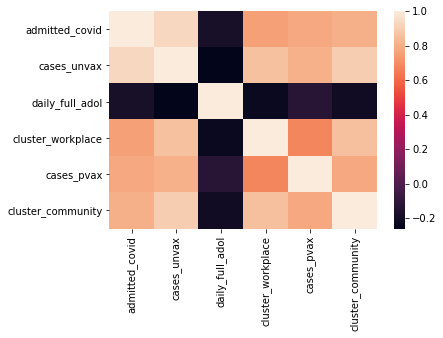

In [26]:
cor_df = selected_df.corr()
round(cor_df,2)
print(cor_df)
sns.heatmap(cor_df)

### Line chart 

<ipython-input-27-633648a61123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['date'] = pd.to_datetime(selected_df["date"])


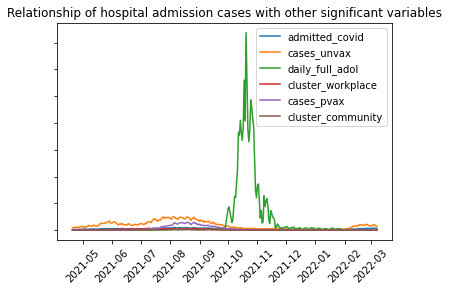

In [27]:
selected_df['date'] = pd.to_datetime(selected_df["date"]) 
plt.plot(selected_df['date'], selected_df['admitted_covid'], label = "admitted_covid")
plt.plot(selected_df['date'], selected_df['cases_unvax'], label = "cases_unvax")
plt.plot(selected_df['date'], selected_df['daily_full_adol'], label = "daily_full_adol")
plt.plot(selected_df['date'], selected_df['cluster_workplace'], label = "cluster_workplace")
plt.plot(selected_df['date'], selected_df['cases_pvax'], label = "cases_pvax")
plt.plot(selected_df['date'], selected_df['cluster_community'], label = "cluster_community")
plt.legend()
plt.xticks(rotation=45)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.title('Relationship of hospital admission cases with other significant variables')
plt.show()

### Select independent variables and dependent variable

In [28]:
X = selected_df.iloc[:,2:].values
y = selected_df['admitted_covid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("The size of training data: " + str(len(X_train)))
print("The size of testing data: " + str(len(X_test)))

The size of training data: 159
The size of testing data: 160


In [29]:
selected_df.iloc[:,2]

392    2322
393    2317
394    2841
395    2810
396    2676
       ... 
711    4996
712    5188
713    4927
714    4083
715    3838
Name: cases_unvax, Length: 319, dtype: int64

### Mutliple Linear Regression

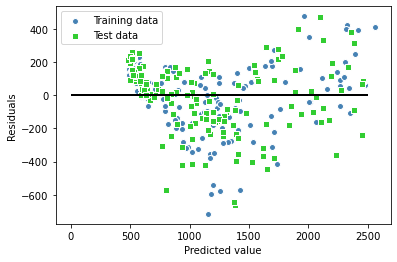

RMSE train: 203.161, test: 201.021
R^2 train: 0.889, test: 0.892


In [30]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2500, color='black', lw=2)
plt.show()
print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

### Ridge Regression

In [31]:
# grid search hyperparameters for ridge regression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
model = Ridge(normalize = True)
# define search
search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: -207.298
Config: {'alpha': 0.0}


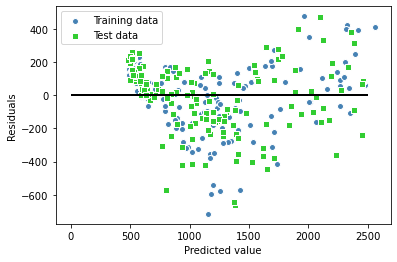

RMSE train: 203.161, test: 201.021
R^2 train: 0.889, test: 0.892


In [32]:
rr = Ridge(alpha=0, normalize=True)
rr.fit(X_train, y_train)

y_train_rr = rr.predict(X_train)
y_test_rr = rr.predict(X_test)

plt.scatter(y_train_rr, y_train_rr - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_rr, y_test_rr - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2500, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_rr)), np.sqrt(mean_squared_error(y_test, y_test_rr))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_rr), r2_score(y_test, y_test_rr)))

### Lasso Regression

In [33]:
# grid search hyperparameters for lasso regression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
model = Lasso(normalize = True)
# define search
search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: -207.115
Config: {'alpha': 0.13}


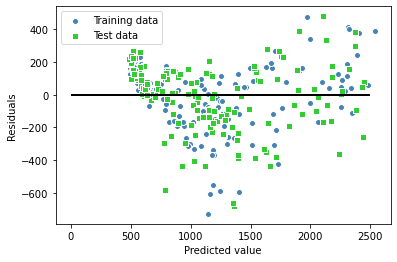

RMSE train: 203.355, test: 201.356
R^2 train: 0.888, test: 0.892


In [34]:
lasso = Lasso(alpha=0.13, normalize = True)
lasso.fit(X_train, y_train)

y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)

plt.scatter(y_train_lasso, y_train_lasso - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_lasso, y_test_lasso - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2500, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_lasso)), np.sqrt(mean_squared_error(y_test, y_test_lasso))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_lasso), r2_score(y_test, y_test_lasso)))

### ElasticNet Regression

In [35]:
# grid search hyperparameters for Elastic net regression
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
model = ElasticNet(normalize = True)
# define search
search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: -206.815
Config: {'alpha': 0.0}


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3281317.7601886685, tolerance: 5893.089159748428
  model = cd_fast.enet_coordinate_descent(


<ipython-input-36-d2445877e53b>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  enet.fit(X_train, y_train)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3281317.7601886685, tolerance: 5893.089159748428
  model = cd_fast.enet_coordinate_descent(


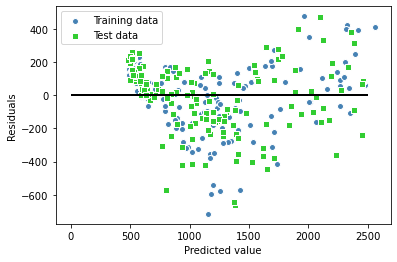

RMSE train: 203.161, test: 201.021
R^2 train: 0.889, test: 0.892


In [36]:
enet = ElasticNet(alpha=0, normalize=True)
enet.fit(X_train, y_train)

y_train_enet = enet.predict(X_train)
y_test_enet= enet.predict(X_test)

plt.scatter(y_train_enet, y_train_enet - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_enet, y_test_enet - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2500, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_enet)), np.sqrt(mean_squared_error(y_test, y_test_enet))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_enet), r2_score(y_test, y_test_enet)))

### Polynomial regression

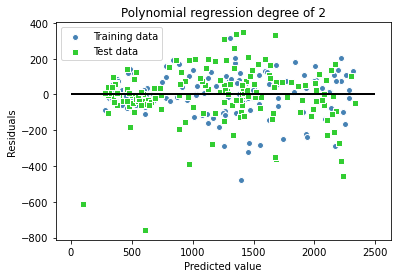

RMSE train: 112.682, test: 149.929
R^2 train: 0.966, test: 0.940


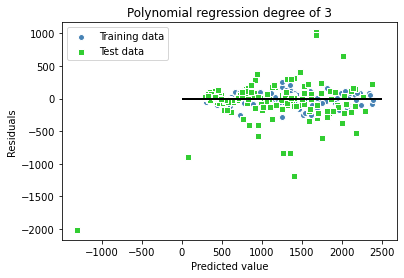

RMSE train: 93.471, test: 300.875
R^2 train: 0.976, test: 0.758


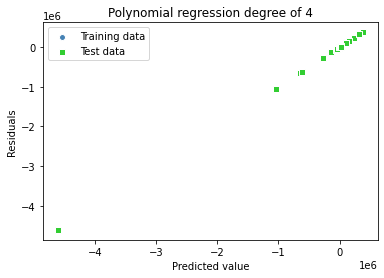

RMSE train: 79.104, test: 384290.235
R^2 train: 0.983, test: -394894.513


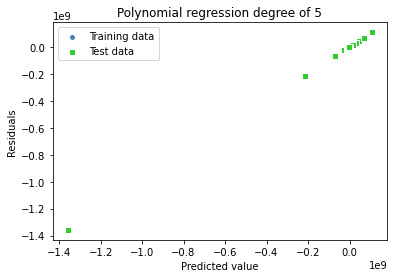

RMSE train: 38.121, test: 109464322.173
R^2 train: 0.996, test: -32041193649.455


In [37]:
i = 2
while i < 6:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    
    y_train_poly = pol_reg.predict(poly_reg.fit_transform(X_train))
    y_test_poly= pol_reg.predict(poly_reg.fit_transform(X_test))
    plt.scatter(y_train_poly, y_train_poly - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
    plt.scatter(y_test_poly, y_test_poly - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
    plt.xlabel('Predicted value')
    plt.ylabel('Residuals')
    plt.title('Polynomial regression degree of ' + str(i))
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=2500, color='black', lw=2)
    plt.show()
    print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_poly)), np.sqrt(mean_squared_error(y_test, y_test_poly))))
    print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_poly), r2_score(y_test, y_test_poly)))
    i += 1

    

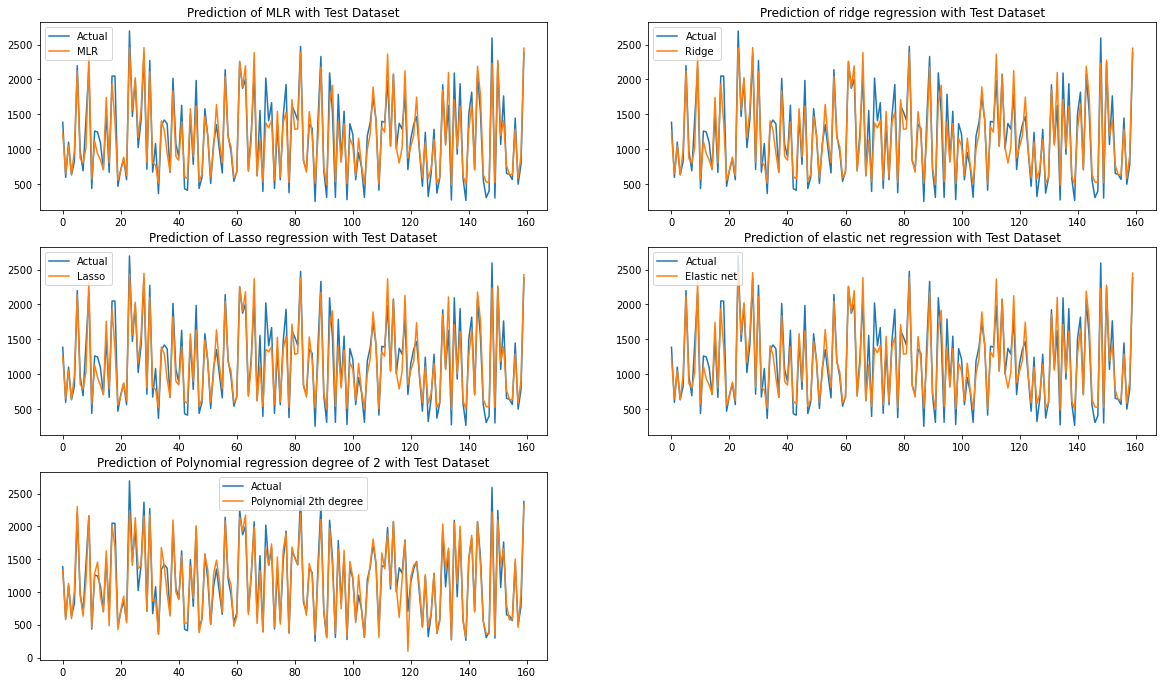

In [53]:
plt. subplots(figsize=(20,20))
plt.subplot(5, 2, 1)
plt.plot(y_test, label = "Actual")
plt.plot(y_test_pred, label = "MLR")
plt.legend()
plt.title('Prediction of MLR with Test Dataset')
plt.subplot(5, 2, 2)
plt.plot(y_test, label = "Actual")
plt.plot(y_test_rr, label = "Ridge")
plt.legend()
plt.title('Prediction of ridge regression with Test Dataset')
plt.subplot(5, 2, 3)
plt.plot(y_test, label = "Actual")
plt.plot(y_test_lasso, label = "Lasso")
plt.legend()
plt.title('Prediction of Lasso regression with Test Dataset')
plt.subplot(5, 2, 4)
plt.plot(y_test, label = "Actual")
plt.plot(y_test_enet, label = "Elastic net")
plt.legend()
plt.title('Prediction of elastic net regression with Test Dataset')
poly_reg_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_reg_2.fit_transform(X_train)
pol_reg_2 = LinearRegression()
pol_reg_2.fit(X_poly, y_train)
X_poly_2_predict = poly_reg_2.fit_transform(X_test)
y_pred_poly = pol_reg_2.predict(X_poly_2_predict)
plt.subplot(5, 2, 5)
plt.plot(y_test, label = "Actual")
plt.plot(y_pred_poly, label = "Polynomial 2th degree")
plt.legend()
plt.title('Prediction of Polynomial regression degree of 2 with Test Dataset')
plt.legend()
#plt.xticks(rotation=45)
#ax = plt.gca()
#ax.axes.yaxis.set_ticklabels([])
plt.show()

In [57]:
df_filepath = '/Users/User/Desktop/P2 coding/testing.csv'
df_testing = pd.read_csv(df_filepath)

X_predict = df_testing[['cases_unvax', 'daily_full_adol', 'cluster_workplace', 'cases_pvax', 'cluster_community']].values
y_predict = df_testing['admitted_covid'].values

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
X_poly_predict = poly_reg.fit_transform(X_predict)
y_pred = pol_reg.predict(X_poly_predict)
    
df_preds = pd.DataFrame({'Date': df_testing['date'], 'Actual': y_predict.squeeze(), 'Predicted': y_pred.squeeze()})
print('RMSE predict: %.3f' % (np.sqrt(mean_squared_error(y_predict, y_pred))))
pd.set_option('display.max_rows', None)
print(df_preds)
print(df_testing.describe())

RMSE predict: 102.993
         Date  Actual    Predicted
0    4/1/2022     895  1043.606671
1    4/2/2022     635   848.184514
2    4/3/2022     533   770.391754
3    4/4/2022     519   633.763307
4    4/5/2022     557   746.503037
5    4/6/2022     564   727.809885
6    4/7/2022     541   740.230535
7    4/8/2022     506   787.569616
8    4/9/2022     488   711.982238
9   4/10/2022     381   526.909593
10  4/11/2022     427   530.500374
11  4/12/2022     395   537.708204
12  4/13/2022     420   575.227172
13  4/14/2022     374   731.577828
14  4/15/2022     370   553.548831
15  4/16/2022     331   619.293428
16  4/17/2022     241   389.935289
17  4/18/2022     308   446.838254
18  4/19/2022     241   341.093485
19  4/20/2022     243   395.194032
20  4/21/2022     213   373.205923
21  4/22/2022     235   356.145512
22  4/23/2022     218   345.932736
23  4/24/2022     164   263.576183
24  4/25/2022     143   214.985859
25  4/26/2022     180   244.463108
26  4/27/2022     161   247.06111

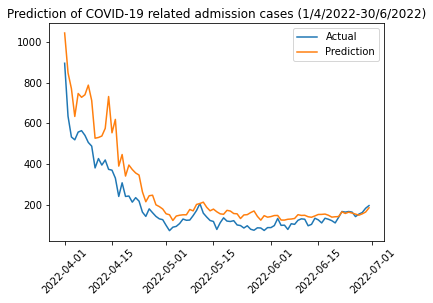

In [39]:
df_testing['date'] = pd.to_datetime(df_testing["date"]) 
plt.plot(df_testing['date'], y_predict, label = "Actual")
plt.plot(df_testing['date'], y_pred, label = "Prediction")
plt.legend()
plt.xticks(rotation=45)
#ax = plt.gca()
#ax.axes.yaxis.set_ticklabels([])
plt.title('Prediction of COVID-19 related admission cases (1/4/2022-30/6/2022)')
plt.show()